In [2]:
import random
import json
import pickle
import numpy as np

import nltk
from nltk.stem import WordNetLemmatizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD

In [3]:
lemmatizer = WordNetLemmatizer()

intents = json.loads(open('intents.json').read())

words = []
classes = []
documents = []
ignore_letters = ['?', '!',',','.']

for intent in intents['intents']:
    for pattern in intent['patterns']:
        word_list = nltk.word_tokenize(pattern)
        words.extend(word_list)
        documents.append((word_list,intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
#print(words)
#print(classes)
#print(documents)


In [4]:
words = [lemmatizer.lemmatize(word) for word in words if word not in ignore_letters]
words = sorted(set(words))

classes = sorted(set(classes))

pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))


In [7]:
training = []
output_empty = [0] * len(classes)

for document in documents:
    bag =[]
    word_patterns = document[0]
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1
    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training)

train_x = list(training[:, 0])
train_y = list(training[:, 1])

model = Sequential()
model.add(Dense(256, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
#model.save('chatbotmodel.h5', history)

print('Done')

C:\Users\bnite\AppData\Local\Temp\ipykernel_50604\1835777044.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


Epoch 1/200
23/23 [==============================] - 2s 4ms/step - loss: 3.2427 - accuracy: 0.0625
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 3.1640 - accuracy: 0.0804
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 3.1278 - accuracy: 0.0536
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 2.9979 - accuracy: 0.1250
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 2.9636 - accuracy: 0.1250
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 2.8408 - accuracy: 0.2321
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 2.7544 - accuracy: 0.2054
Epoch 8/200
23/23 [==============================] - 0s 4ms/step - loss: 2.7021 - accuracy: 0.1786
Epoch 9/200
23/23 [==============================] - 0s 4ms/step - loss: 2.6088 - accuracy: 0.2411
Epoch 10/200
23/23 [==============================] - 0s 4ms/step - loss: 2.3796 - accuracy: 0.2768
Epoch 11/

23/23 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.7857
Epoch 84/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5012 - accuracy: 0.8214
Epoch 85/200
23/23 [==============================] - 0s 4ms/step - loss: 0.6995 - accuracy: 0.7589
Epoch 86/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5167 - accuracy: 0.8304
Epoch 87/200
23/23 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.8214
Epoch 88/200
23/23 [==============================] - 0s 4ms/step - loss: 0.6050 - accuracy: 0.7857
Epoch 89/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5214 - accuracy: 0.8304
Epoch 90/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5069 - accuracy: 0.8393
Epoch 91/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5312 - accuracy: 0.7768
Epoch 92/200
23/23 [==============================] - 0s 4ms/step - loss: 0.4288 - accuracy: 0.8393
Epoch 93/200


23/23 [==============================] - 0s 3ms/step - loss: 0.4869 - accuracy: 0.8393
Epoch 165/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5489 - accuracy: 0.8393
Epoch 166/200
23/23 [==============================] - 0s 4ms/step - loss: 0.3350 - accuracy: 0.8929
Epoch 167/200
23/23 [==============================] - 0s 4ms/step - loss: 0.4129 - accuracy: 0.8839
Epoch 168/200
23/23 [==============================] - 0s 4ms/step - loss: 0.4972 - accuracy: 0.8750
Epoch 169/200
23/23 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.8393
Epoch 170/200
23/23 [==============================] - 0s 3ms/step - loss: 0.4039 - accuracy: 0.8571
Epoch 171/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5569 - accuracy: 0.8661
Epoch 172/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5948 - accuracy: 0.8214
Epoch 173/200
23/23 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.8482
Epoc

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               45568     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 25)               

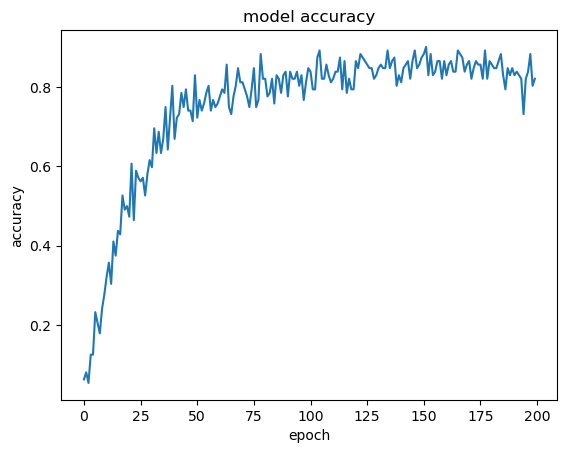

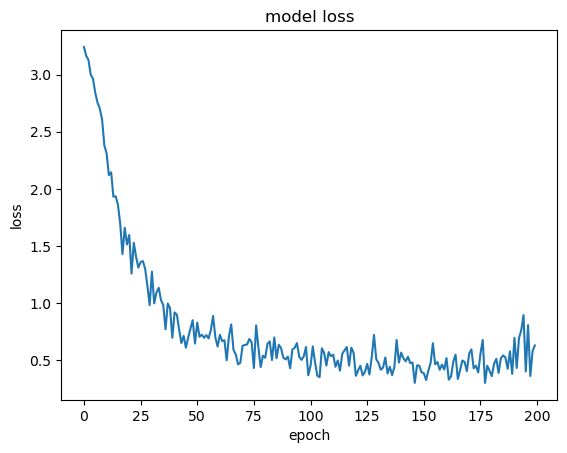

In [9]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [11]:
from sklearn.metrics import precision_recall_fscore_support

In [12]:
y_true = y_test
# Predict on test data
y_pred = model.predict(X_test)
precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=1)
# Calculate evaluation metrics
print('Confusion matrix:')

print(classification_report(y_true, y_pred, zero_division=0))

print(confusion_matrix(y_test, y_pred))
print('Classification report:')
print(classification_report(y_test, y_pred))

1/1 [==============================] - 0s 271ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets